### Gaussian Moving Average
This uses a single gaussian distribution to track a moving average without hanging on to any old points. Instead, the history is held onto in the parameters that dictate the prior used for the fitting at the next step. To ensure that the distribution 'discards' old points, we flatten the parameter distributions without modifying the predictive distribution. See https://www.desmos.com/calculator/15zdvqhvxo for a visualization.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from scipy import stats as spstats

import sys as sys
sys.path.append('..')

from bayes.clustering.parametric.analytic import SingleGauss

<IPython.core.display.Javascript object>


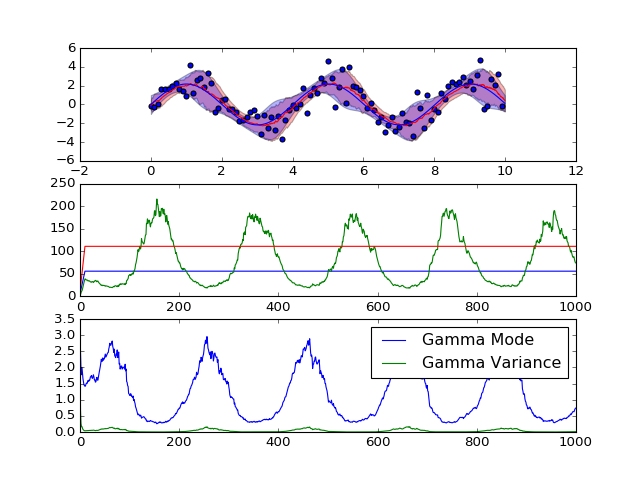

In [88]:
def prec(x, a, f):
    """Returns a precision given x and two scalars
        a for amplitude
        f for frequency
    """
    return np.exp(a*np.sin(f*x))

def mean(x, a, f):
    """Returns a mean given x and two scalars
        a for amplitude
        f for frequency
    """
    return a*np.sin(f*x)

numPoints = 10
steps = 1000
period = 10
au = np.random.uniform(0., 4.)
fu = np.random.uniform(0., 4.)
ar = np.random.uniform(0., 4.)
fr = np.random.uniform(0., 4.)
sg = SingleGauss(alpha=1., beta=0.01, mup=0., scale=1.)

actualu = []
actualstdev= []
inferu = []
inferstdev = []
tfull = []

tscat = []
yscat = []

alpha = []
beta = []
scale = []

pmode = []
pvar = []

for i in range(steps):
    t = i*10./steps
    tfull.append(t)
    mu, tau = mean(t, au, fu), prec(t, ar, fr)
    
    y = np.random.normal(mu, np.sqrt(tau**-1), numPoints)
    
    tscat.extend(np.ones(numPoints)*t)
    yscat.extend(y)
    
    if i > period:
    #if i == steps/2:
        sg.flatten(numPoints)
        #print "Flattening!"
        #sg.flatten()
    sg.fit(y)
    
    actualu.append(mu)
    actualstdev.append(np.sqrt(tau**-1))
    
    inferu.append(sg.mup)
    inferstdev.append(np.sqrt(sg.variance()))
    
    alpha.append(sg.alpha)
    beta.append(sg.beta)
    scale.append(sg.scale)
    
    pmode.append((sg.alpha-1)/sg.beta)
    pvar.append(sg.alpha/sg.beta**2)

actualu = np.array(actualu)
actualstdev = np.array(actualstdev)
inferu = np.array(inferu)
inferstdev = np.array(inferstdev)

tscat = np.array(tscat)
yscat = np.array(yscat)

ax1 = plt.subplot(311)
plt.plot(tfull, inferu, c="r", label="Inferred")
plt.fill_between(tfull, inferu-inferstdev, inferu+inferstdev, facecolor="r", alpha=0.3)

plt.plot(tfull, actualu, c="b", label="Actual")
plt.fill_between(tfull, actualu-actualstdev, actualu+actualstdev, facecolor="b", alpha=0.3)

scati = np.arange(0, numPoints*steps, (numPoints*steps)/100)
plt.scatter(tscat[scati], yscat[scati])

ax2 = plt.subplot(312)
plt.plot(alpha, label="alpha")
plt.plot(beta, label="beta")
plt.plot(scale, label="scale")

ax3 = plt.subplot(313)
plt.plot(pmode, label="Gamma Mode")
plt.plot(pvar, label="Gamma Variance")

plt.legend()

Demonstrated below, the .flatten() method does not change the predictive distribution.

<IPython.core.display.Javascript object>


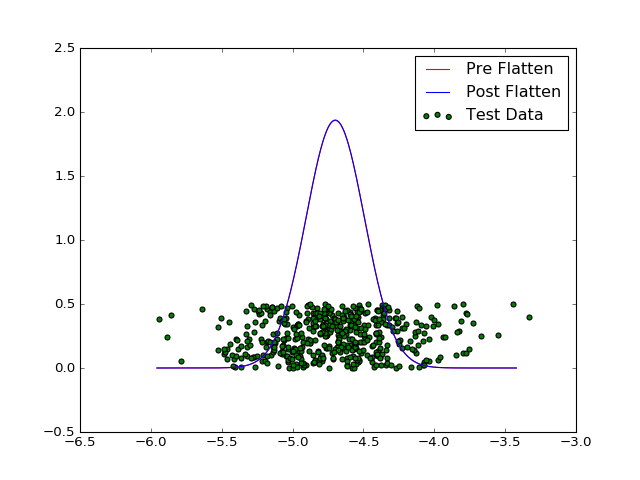

In [98]:
#```python
numPoints = 500

sg = SingleGauss(alpha=1., beta=0.1, mup=0., scale=1.)
for k in range(1):
    prec = np.random.uniform(0.01, 20.)
    mean = np.random.uniform(-15., 15.)

    y = np.random.uniform(0., .5, numPoints)
    x = np.random.normal(mean, prec**-1, numPoints)

    sg.fit(x)
    prereign = sg.predict()

    sg.flatten(numPoints/2)
    postreign = sg.predict()


plotx = np.linspace(mean-2.*np.sqrt(prec**-1), mean+2.*np.sqrt(prec**-1), 1000)



plt.scatter(x, y, label='Test Data', c='g')
curve = plt.plot(plotx, prereign.pdf(plotx), c="r", label='Pre Flatten')
curve = plt.plot(plotx, postreign.pdf(plotx), label='Post Flatten')
plt.legend()
#```